# Notebook 8 - Model interpertation

In [1]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 4.6 MB/s eta 0:00:00


In [2]:
################################## MODIFY PATHS TO RUN THE NOTEBOOK #########################################
data_folder = '/content/drive/Othercomputers/My Laptop/סמסטר א/למידה חישובית למדעי המוח/final project/data/'
code_folder = '/content/drive/Othercomputers/My Laptop/סמסטר א/למידה חישובית למדעי המוח/final project/code/'
##############################################################################################################

# mount drive:
from google.colab import drive
drive.mount('/content/drive')

# imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import shap
from keras.models import load_model

# unpack original data + pca columns pkl - v5:
with open(data_folder + 'processed_data_v5.pkl', 'rb') as f:
    data = pickle.load(f)
X_train, X_val, X_test  = data['X_train'], data['X_val'], data['X_test']
y_train, y_val, y_test = data['y_train'], data['y_val'], data['y_test']

# unpack the pca object:
with open(data_folder + 'processed_data_v3.pkl', 'rb') as f:
    data = pickle.load(f)
pca = data['pca']


# concate:
X_train_all = pd.concat((X_train, X_val))
y_train_all = pd.concat((y_train, y_val))

# load model:
model = load_model(data_folder + 'final_model.h5')

Mounted at /content/drive


In [ ]:
# run this lines to prevent some weird problems - taken from a gitthub discussion
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough
shap.explainers._deep.deep_tf.op_handlers["LeakyRelu"] = shap.explainers._deep.deep_tf.op_handlers["Relu"]

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


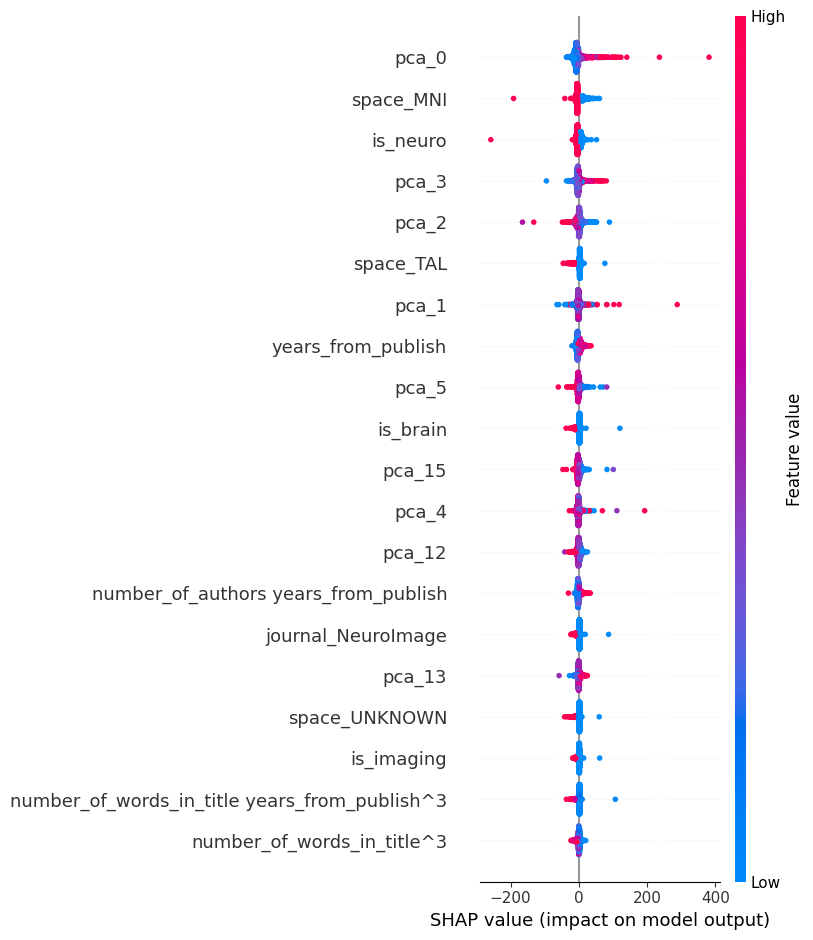

In [ ]:
# sample random data to reduce time complexity
X_train_sample = np.asarray(X_train_all.sample(n=1000, random_state=42)).astype('float32')

# shap explainer
explainer = shap.DeepExplainer(model, X_train_sample)
shap_values = explainer.shap_values(X_train_sample)
# plot for the train set:
plt.figure(figsize=(30,10))
shap.summary_plot(shap_values[:,:,0], X_train_sample, feature_names=X_train.columns)

Text(0.5, 1.0, 'Mean shap values - Top 20 features')

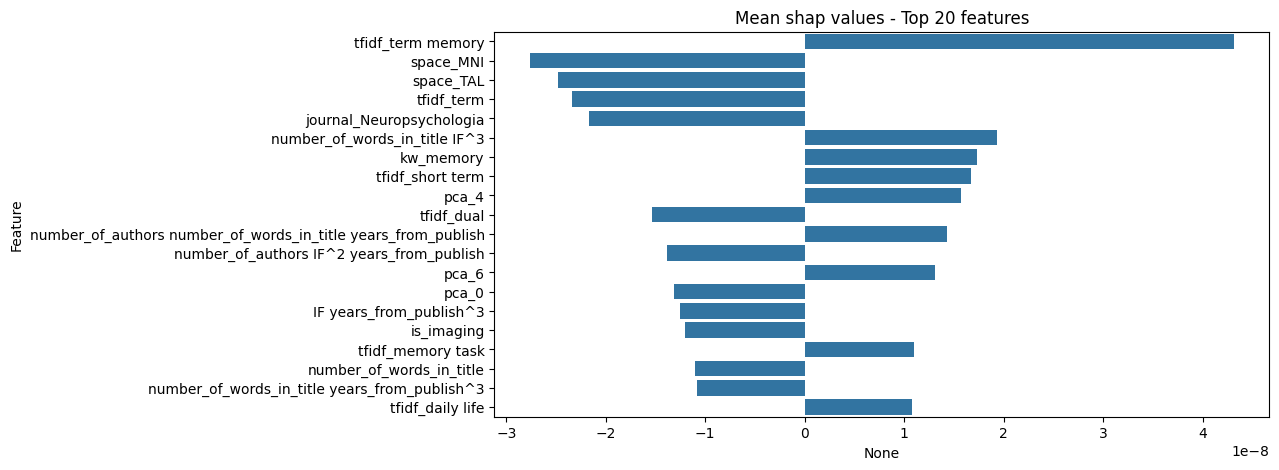

In [ ]:
shap_df = pd.DataFrame(shap_values[:,:,0], columns=X_train.columns)
mean_shap_value = shap_df.mean(axis=0).sort_values(key=lambda x: np.abs(x), ascending=False)
top20 = mean_shap_value.head(20)
# plot the top 20:
plt.figure(figsize=(10,5))
sns.barplot(y=top20.index, x=top20)
plt.xticks(rotation=0)
plt.ylabel('Feature')
plt.title('Mean shap values - Top 20 features')

Text(0.5, 1.0, 'Mean shap values distribution')

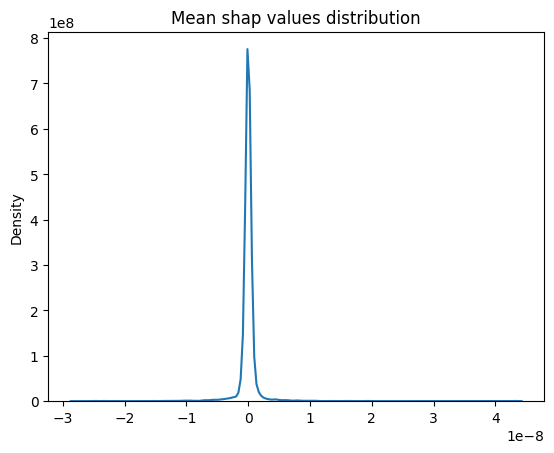

In [ ]:
# plot bar also:
# shap.summary_plot(shap_values[:,:,0], X_train_sample, feature_names=X_train.columns, plot_type='bar')
sns.kdeplot(shap_values[:,:,0].mean(axis=0))
plt.title('Mean shap values distribution')

Text(0.5, 1.0, 'PC0 loadings (top 15)')

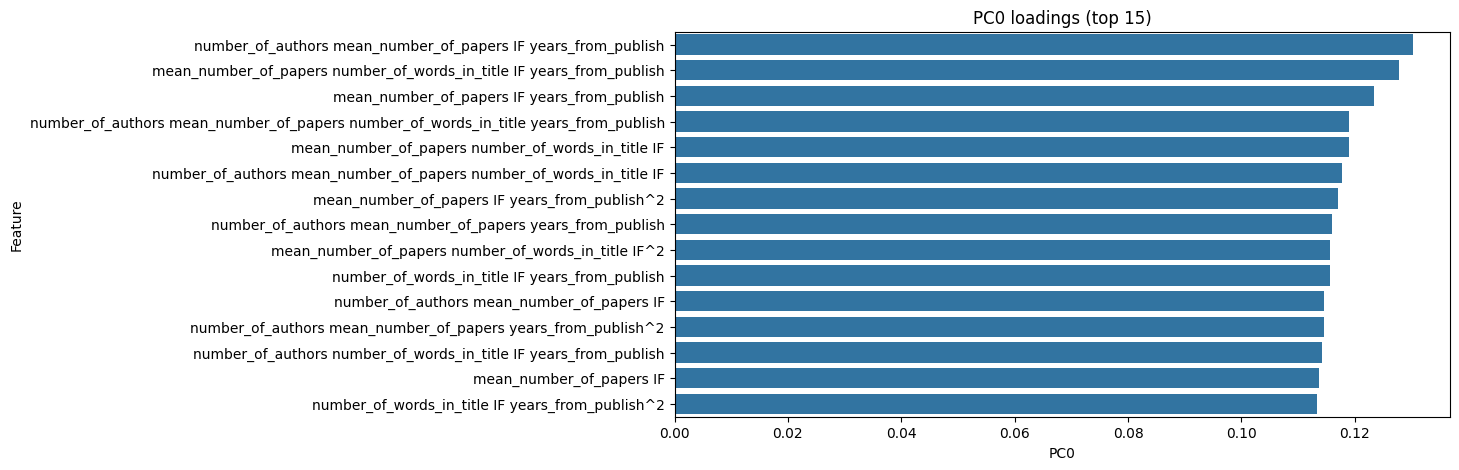

In [3]:
# let's interpertate the pca:
loadings = pca.components_.T
loading_matrix = pd.DataFrame(loadings, columns=['PC' + str(i) for i in range(loadings.shape[1])],
                              index=[col for col in X_train.columns if 'pca' not in col])

# create a df for the top n loadings:
def top_n_loadings(pc, loading_matrix,top_n=15):
    sorted_loadings = loading_matrix[pc].abs().sort_values(ascending=False).head(top_n)
    return pd.DataFrame(sorted_loadings)

pc0_top = top_n_loadings('PC0', loading_matrix)
pc1_top = top_n_loadings('PC1', loading_matrix)
pc2_top = top_n_loadings('PC2', loading_matrix)
pc3_top = top_n_loadings('PC3', loading_matrix)
pc4_top = top_n_loadings('PC4', loading_matrix)

# plot a barplot for pc0:
plt.figure(figsize=(10,5))
sns.barplot(y=pc0_top.index, x=pc0_top['PC0'])
plt.xticks(rotation=0)
plt.ylabel('Feature')
plt.title('PC0 loadings (top 15)')

Text(0.5, 1.0, 'PC1 loadings (top 15)')

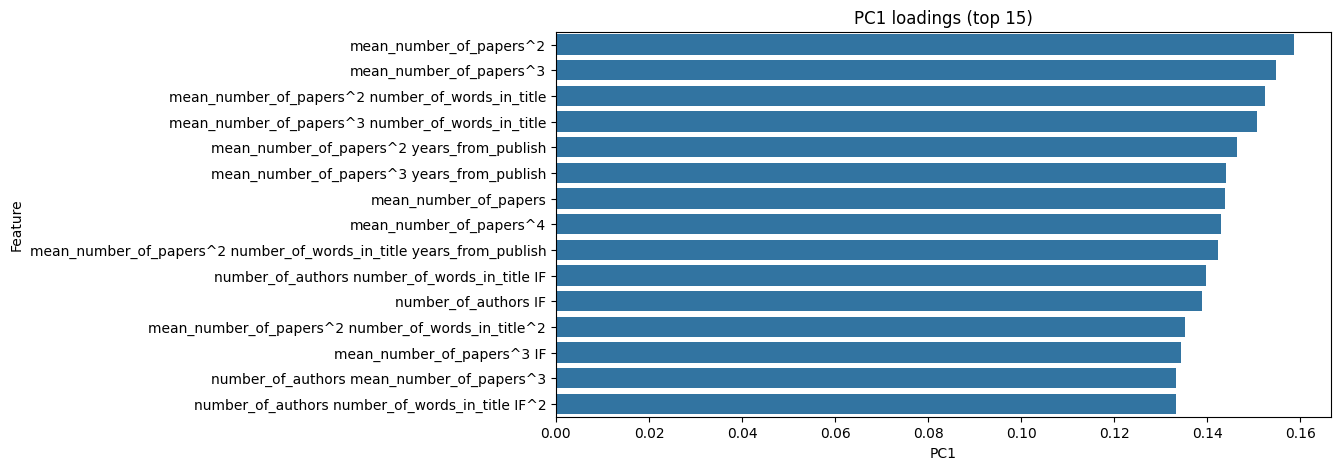

In [ ]:
# plot a barplot for pc1:
plt.figure(figsize=(10,5))
sns.barplot(y=pc1_top.index, x=pc1_top['PC1'])
plt.xticks(rotation=0)
plt.ylabel('Feature')
plt.title('PC1 loadings (top 15)')

Text(0.5, 1.0, 'PC2 loadings (top 15)')

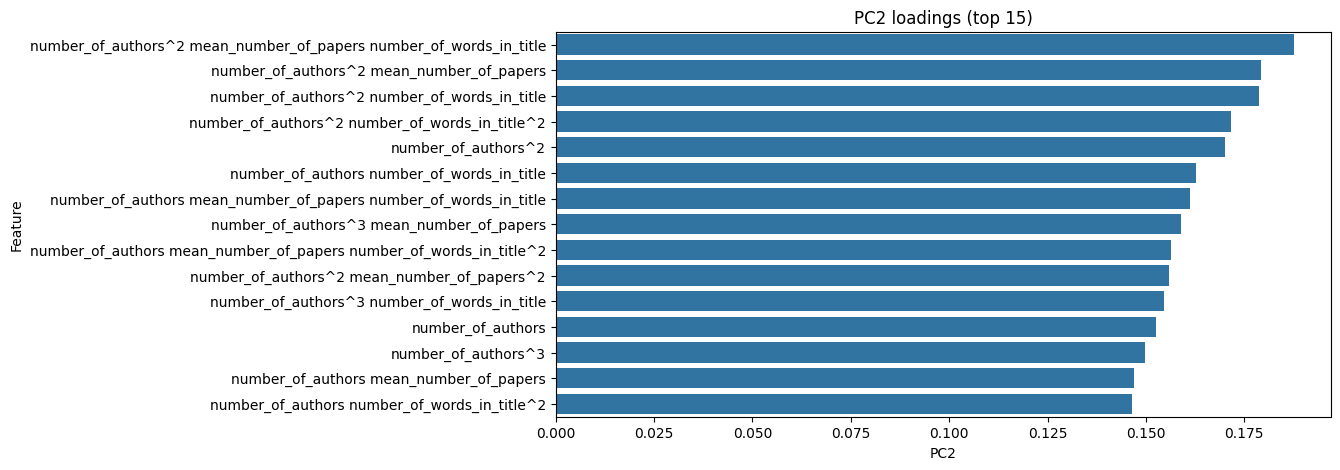

In [ ]:
# plot a barplot for pc2:
plt.figure(figsize=(10,5))
sns.barplot(y=pc2_top.index, x=pc2_top['PC2'])
plt.xticks(rotation=0)
plt.ylabel('Feature')
plt.title('PC2 loadings (top 15)')

Text(0.5, 1.0, 'PC3 loadings (top 15)')

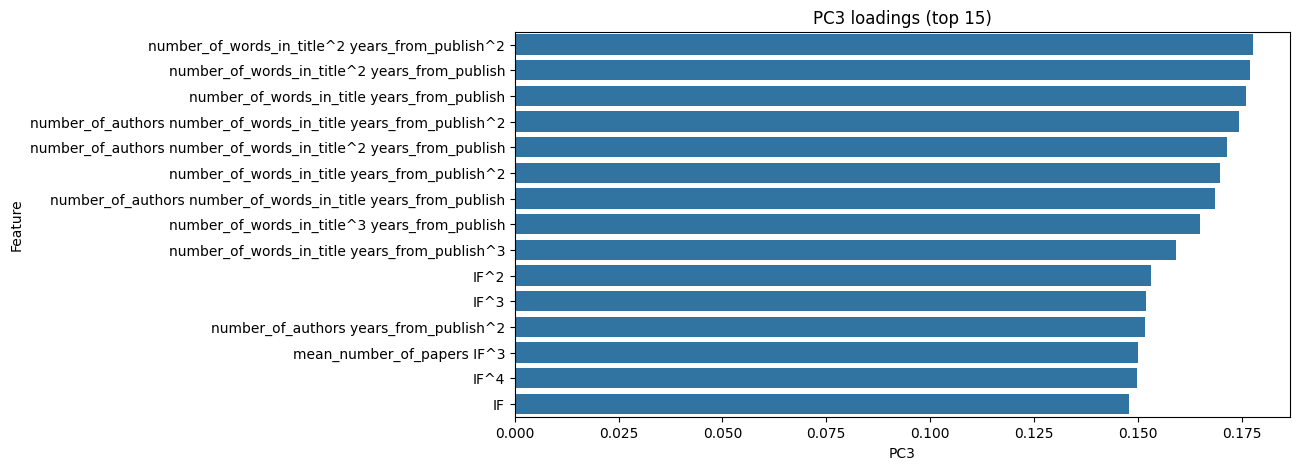

In [4]:
# plot a barplot for pc3:
plt.figure(figsize=(10,5))
sns.barplot(y=pc3_top.index, x=pc3_top['PC3'])
plt.xticks(rotation=0)
plt.ylabel('Feature')
plt.title('PC3 loadings (top 15)')